##### Loading the required Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

##### Loading the dataset

In [2]:
data = pd.read_csv("employee_experience_survey_data.csv")

##### Shape of the dataset

In [3]:
data.shape

(15, 18)

##### Loading the first five obseravtion of data

In [4]:
data.head(5)

,Name,Age Bracket,Gender,Ethnicity,Job Title,Department,Date Survey Completed,Job Satisfaction,Work-Life Balance,Management Support,Team Collaboration,Workload Fairness,Career Development Opportunities,Workplace Inclusivity,Company Communication,Compensation Satisfaction,Job Security,Overall Engagement
0,John Doe,25-34,Female,Asian,Product Manager,Product Development,10/5/2024,Disagree,Strongly Agree,Neutral,Neutral,Neutral,Disagree,Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree
1,Jane Smith,18-24,Female,Middle Eastern,Operations Manager,Sales,10/7/2024,Agree,Strongly Disagree,Strongly Agree,Neutral,Neutral,Disagree,Neutral,Neutral,Neutral,Agree,Neutral
2,Carlos Reyes,45-54,Female,Indian,UX Designer,Consulting,10/8/2024,Neutral,Strongly Disagree,Agree,Disagree,Strongly Agree,Agree,Agree,Strongly Disagree,Neutral,Strongly Agree,Strongly Agree
3,Emily Zhang,35-44,Male,Caucasian,UX Designer,HR,10/7/2024,Neutral,Agree,Agree,Strongly Disagree,Strongly Disagree,Strongly Agree,Agree,Strongly Disagree,Strongly Disagree,Agree,Neutral
4,Michael Johnson,18-24,Female,Caucasian,UX Designer,Product Development,10/7/2024,Agree,Strongly Agree,Disagree,Neutral,Strongly Disagree,Disagree,Disagree,Disagree,Strongly Disagree,Neutral,Disagree


##### Getting the information about the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Name                              15 non-null     object
 1   Age Bracket                       15 non-null     object
 2   Gender                            15 non-null     object
 3   Ethnicity                         15 non-null     object
 4   Job Title                         15 non-null     object
 5   Department                        15 non-null     object
 6   Date Survey Completed             15 non-null     object
 7   Job Satisfaction                  15 non-null     object
 8   Work-Life Balance                 15 non-null     object
 9   Management Support                15 non-null     object
 10  Team Collaboration                15 non-null     object
 11  Workload Fairness                 15 non-null     object
 12  Career Development Oppor

##### Summary of the dataset: 

In [6]:
data.drop(columns=['Name','Gender']).describe().T

,count,unique,top,freq
Age Bracket,15,4,18-24,7
Ethnicity,15,6,Middle Eastern,4
Job Title,15,8,UX Designer,4
Department,15,8,Sales,4
Date Survey Completed,15,7,10/7/2024,4
Job Satisfaction,15,5,Disagree,4
Work-Life Balance,15,5,Strongly Agree,5
Management Support,15,5,Strongly Disagree,5
Team Collaboration,15,5,Neutral,5
Workload Fairness,15,5,Neutral,5


##### Extracting the demographic features from the dataset: 

In [7]:
data.columns

Index(['Name', 'Age Bracket', 'Gender', 'Ethnicity', 'Job Title', 'Department',
       'Date Survey Completed', 'Job Satisfaction', 'Work-Life Balance',
       'Management Support', 'Team Collaboration', 'Workload Fairness',
       'Career Development Opportunities', 'Workplace Inclusivity',
       'Company Communication', 'Compensation Satisfaction', 'Job Security',
       'Overall Engagement'],
      dtype='object')

In [8]:
Demographic_feature = data[['Age Bracket', 'Gender', 'Ethnicity']]

In [9]:
data.head()

,Name,Age Bracket,Gender,Ethnicity,Job Title,Department,Date Survey Completed,Job Satisfaction,Work-Life Balance,Management Support,Team Collaboration,Workload Fairness,Career Development Opportunities,Workplace Inclusivity,Company Communication,Compensation Satisfaction,Job Security,Overall Engagement
0,John Doe,25-34,Female,Asian,Product Manager,Product Development,10/5/2024,Disagree,Strongly Agree,Neutral,Neutral,Neutral,Disagree,Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree
1,Jane Smith,18-24,Female,Middle Eastern,Operations Manager,Sales,10/7/2024,Agree,Strongly Disagree,Strongly Agree,Neutral,Neutral,Disagree,Neutral,Neutral,Neutral,Agree,Neutral
2,Carlos Reyes,45-54,Female,Indian,UX Designer,Consulting,10/8/2024,Neutral,Strongly Disagree,Agree,Disagree,Strongly Agree,Agree,Agree,Strongly Disagree,Neutral,Strongly Agree,Strongly Agree
3,Emily Zhang,35-44,Male,Caucasian,UX Designer,HR,10/7/2024,Neutral,Agree,Agree,Strongly Disagree,Strongly Disagree,Strongly Agree,Agree,Strongly Disagree,Strongly Disagree,Agree,Neutral
4,Michael Johnson,18-24,Female,Caucasian,UX Designer,Product Development,10/7/2024,Agree,Strongly Agree,Disagree,Neutral,Strongly Disagree,Disagree,Disagree,Disagree,Strongly Disagree,Neutral,Disagree


##### Mapping the responses: 

In [10]:
map_responses = {'Strongly Disagree': 1, 'Disagree': 2, 'Neutral': 3, 'Agree': 4, 'Strongly Agree': 5}

# Columns to be responses to be Map:

df = ['Job Satisfaction', 'Work-Life Balance',
       'Management Support', 'Team Collaboration', 'Workload Fairness',
       'Career Development Opportunities', 'Workplace Inclusivity',
       'Company Communication', 'Compensation Satisfaction', 'Job Security',
       'Overall Engagement']

for i in df:
    data[i] = data[i].map(map_responses)

In [11]:
data.head(5)

,Name,Age Bracket,Gender,Ethnicity,Job Title,Department,Date Survey Completed,Job Satisfaction,Work-Life Balance,Management Support,Team Collaboration,Workload Fairness,Career Development Opportunities,Workplace Inclusivity,Company Communication,Compensation Satisfaction,Job Security,Overall Engagement
0,John Doe,25-34,Female,Asian,Product Manager,Product Development,10/5/2024,2,5,3,3,3,2,4,5,5,4,5
1,Jane Smith,18-24,Female,Middle Eastern,Operations Manager,Sales,10/7/2024,4,1,5,3,3,2,3,3,3,4,3
2,Carlos Reyes,45-54,Female,Indian,UX Designer,Consulting,10/8/2024,3,1,4,2,5,4,4,1,3,5,5
3,Emily Zhang,35-44,Male,Caucasian,UX Designer,HR,10/7/2024,3,4,4,1,1,5,4,1,1,4,3
4,Michael Johnson,18-24,Female,Caucasian,UX Designer,Product Development,10/7/2024,4,5,2,3,1,2,2,2,1,3,2


### Descriptive Statistics:

##### Descriptive Statistics for Overall Engagement: 

In [12]:
#Statistics of Overall Engagement: 

data['Overall Engagement'].describe()


count    15.000000
mean      3.400000
std       1.298351
min       1.000000
25%       2.500000
50%       3.000000
75%       4.500000
max       5.000000
Name: Overall Engagement, dtype: float64

##### Descriptive Statistics for Job Satisfaction: 

In [13]:
# Statistics of Job Satisfaction:

print(data['Job Satisfaction'].describe())

count    15.000000
mean      3.000000
std       1.309307
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Job Satisfaction, dtype: float64


##### Key Trends: 

###### Trend by Department:

In [14]:
trend_by_department = data.groupby('Department')['Job Satisfaction'].mean()

print(F'Trend by:{trend_by_department}')

Trend by:Department
Consulting             3.000000
Design                 5.000000
Finance                4.000000
HR                     4.000000
IT                     1.000000
Operations             2.000000
Product Development    2.666667
Sales                  2.750000
Name: Job Satisfaction, dtype: float64


###### Trend of Demograohic feature vs Job Satisfaction:

In [15]:
# Trend by Age Bracket:

for i in Demographic_feature:

    trend_by_age = data.groupby(i)['Job Satisfaction'].mean()
    
    print(F'Trend by:{trend_by_age}')

Trend by:Age Bracket
18-24    3.428571
25-34    3.000000
35-44    2.000000
45-54    2.666667
Name: Job Satisfaction, dtype: float64
Trend by:Gender
Female    2.777778
Male      3.333333
Name: Job Satisfaction, dtype: float64
Trend by:Ethnicity
African American    3.500000
Asian               2.500000
Caucasian           4.000000
Hispanic            4.000000
Indian              1.666667
Middle Eastern      3.000000
Name: Job Satisfaction, dtype: float64


###### Trend by Demographic features vs Work-Life Balance, Compensation Sastisfaction

In [16]:
for i in Demographic_feature:
    demo = data.groupby(i)[['Work-Life Balance']].mean()
    print(F'{demo}')

             Work-Life Balance
Age Bracket                   
18-24                 3.142857
25-34                 4.666667
35-44                 4.500000
45-54                 1.666667
        Work-Life Balance
Gender                   
Female           3.111111
Male             3.666667
                  Work-Life Balance
Ethnicity                          
African American           4.500000
Asian                      4.000000
Caucasian                  4.666667
Hispanic                   1.000000
Indian                     2.666667
Middle Eastern             2.500000


### Inferential Statistics:

In [17]:
# Filtering data for departments: IT, HR, Design and Sales: 

it_data = data[data['Department'] == 'IT']['Job Satisfaction']

hr_data = data[data['Department'] == 'HR']['Job Satisfaction']

design_data = data[data['Department'] == 'Design']['Work-Life Balance']

sales_data = data[data['Department'] == 'Sales']['Work-Life Balance']

In [18]:
# Job Satisfaction- IT and HR 

In [19]:
# H0(Null Hypothesis): There is no significant difference between the two group means (i.e., the mean job satisfaction for IT and HR is the same.) 

# H1(Alternative Hypothesis): There is a significant difference between the two group means (i.e., the mean job satisfaction for IT is different from HR).

t_stat, p_value = stats.ttest_ind(it_data, hr_data)

print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("There is difference in Job Satisfaction between IT and HR is statistically significant.")
else:
    print("There is no significant difference in Job Satisfaction between IT and HR.")

T-statistic: -1.7320508075688774, P-value: 0.33333333333333326
There is no significant difference in Job Satisfaction between IT and HR.


In [20]:
# Work-Life Balance- Sales and Design 

In [21]:
# H0(Null Hypothesis): There is no significant difference between the two group means (i.e., the mean Work Life Balance for Sales and Design is the same.) 

# H1(Alternative Hypothesis): There is a significant difference between the two group means (i.e., the mean Work Life Balance for Sales is different from Design).

t_stat, p_value = stats.ttest_ind(sales_data, design_data)
print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("There is difference in Work Life Balance between Sales and Design is statistically significant.")
else:
    print("There is no significant difference in Work Life Balance between Sales and Design.")

T-statistic: -1.8973665961010275, P-value: 0.15403090300093614
There is no significant difference in Work Life Balance between Sales and Design.


### Correlation analysis:

In [22]:
df1 = data[['Job Satisfaction', 'Work-Life Balance','Management Support',
 'Team Collaboration','Workload Fairness','Career Development Opportunities',
 'Workplace Inclusivity', 'Company Communication', 'Compensation Satisfaction', 'Job Security', 'Overall Engagement']]

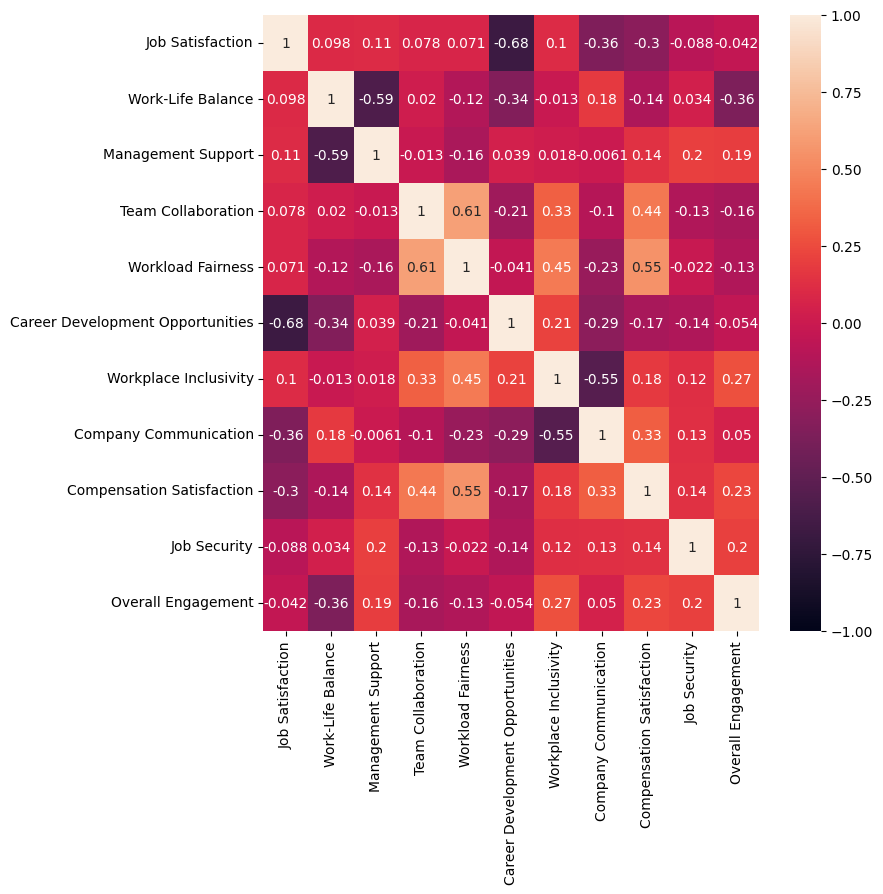

In [23]:
plt.figure(figsize=(8,8))
sns.heatmap(data=df1.corr(),annot = True, vmax=1,vmin=-1)
plt.show()

In [24]:
# Calculating the correlation between Work-Life Balance and Overall Engagement:
corr = data['Work-Life Balance'].corr(data['Overall Engagement'])

# Correlation result
print(f"Correlation between Work-Life Balance and Overall Engagement: {corr}")

if corr > 0:
    print("Positive correlation: As Work-Life Balance improves, Overall Engagement tends to increase.")
elif corr < 0:
    print("Negative correlation: As Work-Life Balance improves, Overall Engagement tends to decrease.")
else:
    print("No correlation between Work-Life Balance and Overall Engagement.")


Correlation between Work-Life Balance and Overall Engagement: -0.361040820409166
Negative correlation: As Work-Life Balance improves, Overall Engagement tends to decrease.
